In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-v0_8')

In [3]:
# Create synthetic linear data with noise
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100) * 1.5

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
class RidgeRegression:
    def __init__(self, lr=0.01, n_iters=1000, lambda_=1.0):
        self.lr = lr
        self.n_iters = n_iters
        self.lambda_ = lambda_
        self.weight = None
        self.bias = None

    def fit(self, X, y):
        m, n = X.shape
        self.weight = np.zeros(n)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weight) + self.bias

            dw = (-2/m) * np.dot(X.T, (y - y_pred)) + 2 * self.lambda_ * self.weight

            db = (-2/m) * np.sum(y - y_pred)

            self.weight -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        return np.dot(X, self.weight) + self.bias

In [7]:
# Initialize and train Ridge from scratch
ridge_model = RidgeRegression(lr=0.05, n_iters=1000, lambda_=10)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 3.7710591583089212
R² Score: 0.005069451901221211


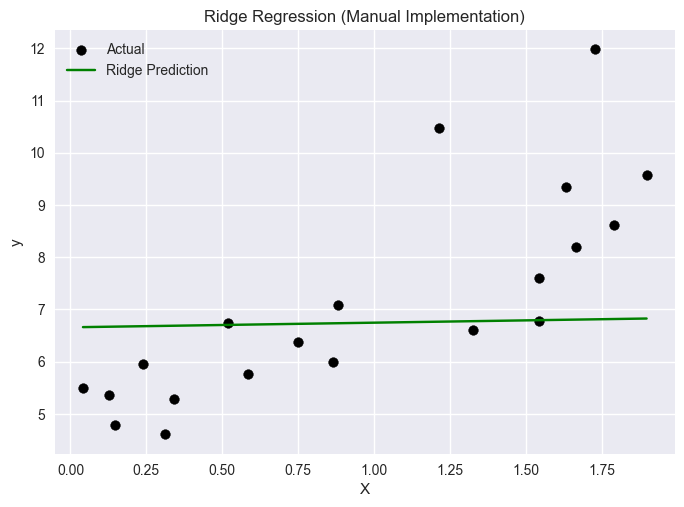

In [8]:
# Sort for clean line plot
sorted_idx = np.argsort(X_test[:, 0])
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test[sorted_idx], y_pred[sorted_idx], color='green', label='Ridge Prediction')

plt.title("Ridge Regression (Manual Implementation)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
